In [1]:
import pandas
import numpy

In [2]:
df = pandas.read_csv("data\\group12classification.csv")

In [3]:
df.set_index("pat_number",inplace=True)

In [61]:
df.head()

,row_date,age,gender,district,label,label_1,gender_1,state_1,state_original,state_Bihar,state_Karnataka,state_Tamil Nadu,age_group_orig,age_middle,age_senior,age_youth,age_1
pat_number,,,,,,,,,,,,,,,,,
74.0,2020-03-13,76.0,M,Kalaburagi,Deceased,0,1,1,Karnataka,0,1,0,senior,0,1,0,75.0
154.0,2020-03-18,20.0,M,Chennai,Hospitalized,1,1,2,Tamil Nadu,0,0,1,middle,1,0,0,64.0
297.0,2020-03-21,39.0,M,Bengaluru Urban,Hospitalized,1,1,1,Karnataka,0,1,0,middle,1,0,0,64.0
301.0,2020-03-21,69.0,M,Erode,Hospitalized,1,1,2,Tamil Nadu,0,0,1,senior,0,1,0,75.0
302.0,2020-03-21,75.0,M,Erode,Hospitalized,1,1,2,Tamil Nadu,0,0,1,senior,0,1,0,75.0


In [64]:
df[["gender","gender_1","age",'age_group_orig',"age_1","state_original","state_1",'label',"label_1"]]

,gender,gender_1,age,age_group_orig,age_1,state_original,state_1,label,label_1
pat_number,,,,,,,,,
74.0,M,1,76.0,senior,75.0,Karnataka,1,Deceased,0
154.0,M,1,20.0,middle,64.0,Tamil Nadu,2,Hospitalized,1
297.0,M,1,39.0,middle,64.0,Karnataka,1,Hospitalized,1
301.0,M,1,69.0,senior,75.0,Tamil Nadu,2,Hospitalized,1
302.0,M,1,75.0,senior,75.0,Tamil Nadu,2,Hospitalized,1
...,...,...,...,...,...,...,...,...,...
101118.0,F,0,21.0,middle,64.0,Bihar,0,Hospitalized,1
101119.0,M,1,20.0,middle,64.0,Bihar,0,Hospitalized,1
101120.0,M,1,40.0,middle,64.0,Bihar,0,Hospitalized,1


<AxesSubplot:>

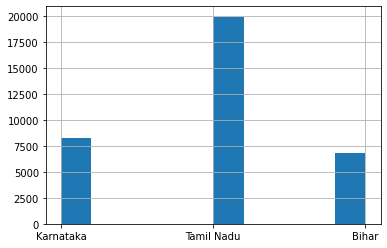

In [68]:
df.state_original.hist()

In [13]:
feature_cols = ["gender_1","age_1","state_1"]
X = df[feature_cols] # Features
y = df["label_1"] # Target variable

In [14]:
df.label_1.value_counts()

1    34737
0      338
Name: label_1, dtype: int64

In [15]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8) # 70% training and 30% test

In [17]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [36]:
y_train.value_counts()

1    27782
0      278
Name: label_1, dtype: int64

In [21]:
smt = SMOTE(k_neighbors=8)

In [25]:
X_train_smt, y_train_smt = smt.fit_resample(X_train,y_train)

In [26]:
y_train_sm.value_counts()

0    27782
1    27782
Name: label_1, dtype: int64

In [54]:
# Create Decision Tree classifer object
clf_smt = None
clf_smt = DecisionTreeClassifier(criterion="gini",max_depth=3)

# Train Decision Tree Classifer
clf_smt = clf_smt.fit(X_train_smt,y_train_smt)

#Predict the response for test dataset
y_pred_smt = clf_smt.predict(X_test)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred_smt)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_smt)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_smt)
print("Accuracy:",result2)

Confusion Matrix:
[[  24   36]
 [ 328 6627]]
Classification Report:
              precision    recall  f1-score   support

           0       0.07      0.40      0.12        60
           1       0.99      0.95      0.97      6955

    accuracy                           0.95      7015
   macro avg       0.53      0.68      0.54      7015
weighted avg       0.99      0.95      0.97      7015

Accuracy: 0.948111190306486


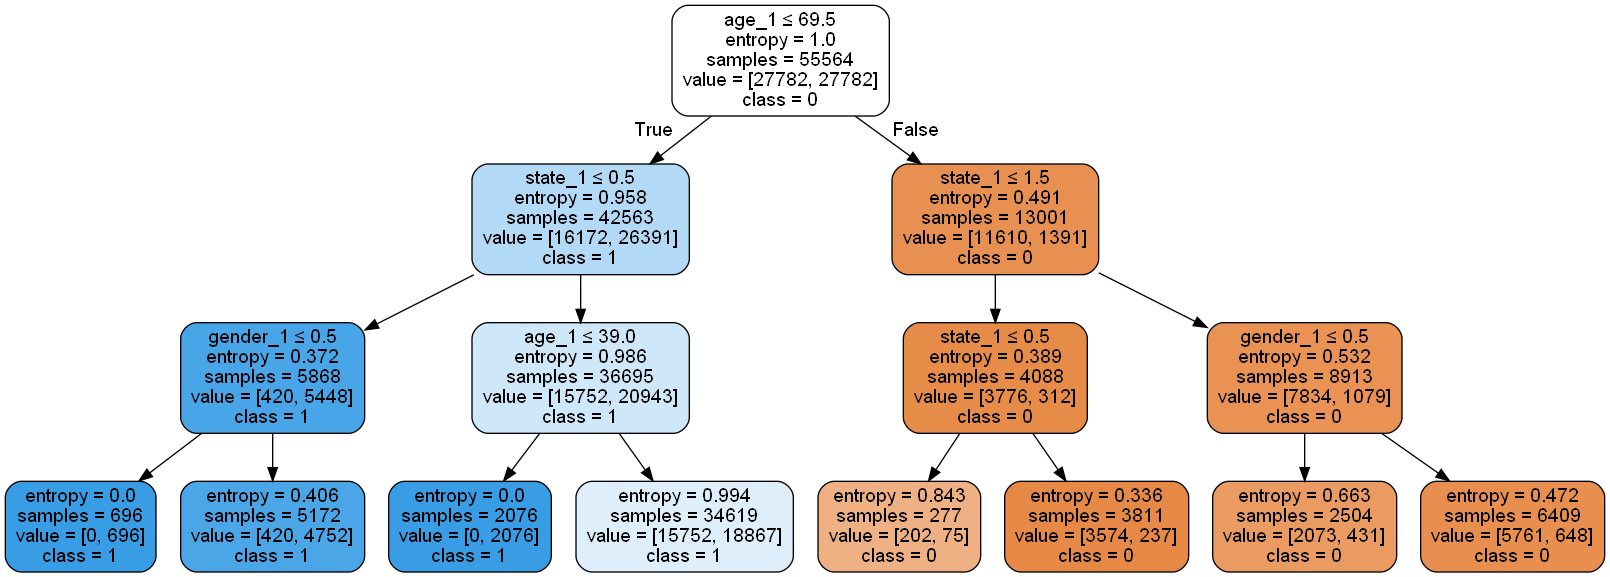

In [39]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_smt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('covid_dtc_entropy_smote_depth3.png')
Image(graph.create_png())

In [40]:
clf = None
clf = DecisionTreeClassifier(criterion="gini",max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[   0   60]
 [   0 6955]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.99      1.00      1.00      6955

    accuracy                           0.99      7015
   macro avg       0.50      0.50      0.50      7015
weighted avg       0.98      0.99      0.99      7015

Accuracy: 0.9914468995010691
C:\Program Files\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [42]:
#Forest Classification
from sklearn.ensemble import RandomForestClassifier

In [52]:
clf_forest = RandomForestClassifier(n_estimators = 100,max_depth=3)
clf_forest.fit(X_train_smt, y_train_smt)
y_pred_forest = clf_forest.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, y_pred_forest)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_forest)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_forest)
print("Accuracy:",result2)

Confusion Matrix:
[[  24   36]
 [ 328 6627]]
Classification Report:
              precision    recall  f1-score   support

           0       0.07      0.40      0.12        60
           1       0.99      0.95      0.97      6955

    accuracy                           0.95      7015
   macro avg       0.53      0.68      0.54      7015
weighted avg       0.99      0.95      0.97      7015

Accuracy: 0.948111190306486


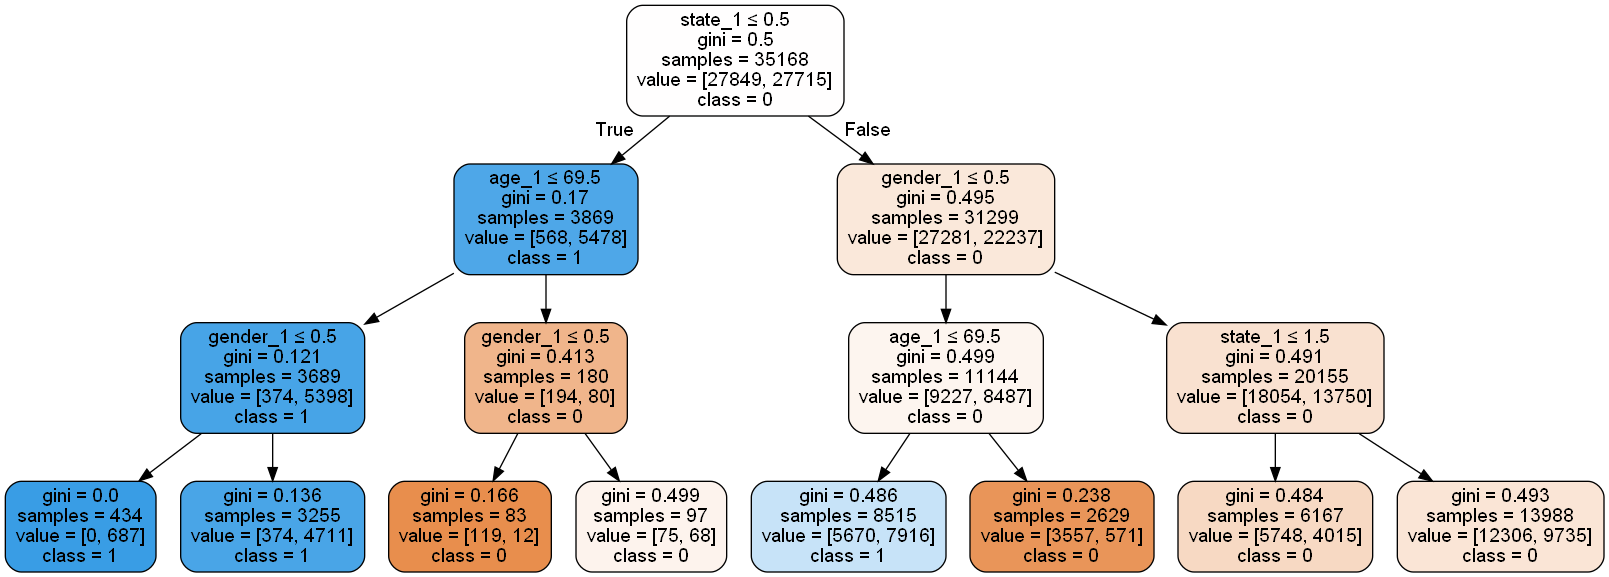

In [53]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_forest.estimators_[3], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('covid_forst_smote.png')
Image(graph.create_png())